In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb


# Combine datasets
df = pd.read_csv('data/ALLFLOWMETER_HIKARI2021.csv')


In [27]:
# Display the first few rows
df.head()

,Unnamed: 0.1,Unnamed: 0,uid,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,0,0,Cg61Jch3vdz9DBptj,103.255.15.23,13316,128.199.242.104,443,2.207588,15,14,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Bruteforce-XML,1
1,1,1,CdRIlqLWdj35Y9vW9,103.255.15.23,13318,128.199.242.104,443,15.624266,15,14,...,1.534300e+07,1.534300e+07,1.534300e+07,1.534300e+07,0.0,29200,65160,0,Bruteforce-XML,1
2,2,2,CLzp9Khd0Y09Qkgrg,103.255.15.23,13320,128.199.242.104,443,12.203357,14,13,...,1.196814e+07,1.196814e+07,1.196814e+07,1.196814e+07,0.0,29200,65160,0,Bruteforce-XML,1
3,3,3,Cnf1YA4iLB4CSNWB88,103.255.15.23,13322,128.199.242.104,443,9.992448,14,13,...,9.759205e+06,9.759205e+06,9.759205e+06,9.759205e+06,0.0,29200,65160,0,Bruteforce-XML,1
4,4,4,C4ZKvv3fpO72EAOsJ6,103.255.15.23,13324,128.199.242.104,443,7.780611,14,14,...,7.545305e+06,7.545305e+06,7.545305e+06,7.545305e+06,0.0,29200,65160,0,Bruteforce-XML,1


In [28]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,originp,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Label
count,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,...,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,555278.000000,555278.000000,555278.000000,555278.000000
mean,277638.500000,137369.392132,38673.198034,5082.161647,9.306544,18.264091,18.892578,7.956928,15.803417,1720.704202,...,1.335883e+05,3.490637e+06,5.000630e+06,8.312942e+06,4.073219e+06,7.992576e+05,14750.725718,21005.879513,4546.872210,0.067887
std,160295.095724,99946.804651,18071.825216,12915.812900,101.802730,463.901484,469.078877,73.441224,467.349374,4994.579973,...,8.289045e+06,1.804930e+07,2.326516e+07,9.683372e+07,1.915958e+07,7.206576e+06,15003.491439,29155.406813,11069.456088,0.251552
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,138819.250000,52201.000000,28581.000000,53.000000,0.000311,1.000000,1.000000,1.000000,0.000000,4.430152,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,277638.500000,121610.500000,42693.500000,443.000000,0.026218,2.000000,2.000000,2.000000,2.000000,39.760205,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5840.000000,0.000000,0.000000,0.000000
75%,416457.750000,211889.750000,53120.000000,443.000000,0.347231,10.000000,12.000000,3.000000,5.000000,80.376058,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200.000000,65160.000000,402.000000,0.000000
max,555277.000000,350709.000000,65535.000000,65522.000000,17393.030600,326292.000000,326827.000000,3953.000000,326822.000000,223696.213333,...,5.438463e+09,2.998038e+08,2.998038e+08,1.738680e+10,2.998038e+08,2.029962e+08,65535.000000,65535.000000,65535.000000,1.000000


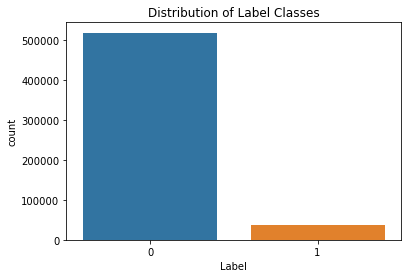

In [29]:
# Plot the distribution of the label
sns.countplot(x='Label', data=df)
plt.title('Distribution of Label Classes')
plt.show()

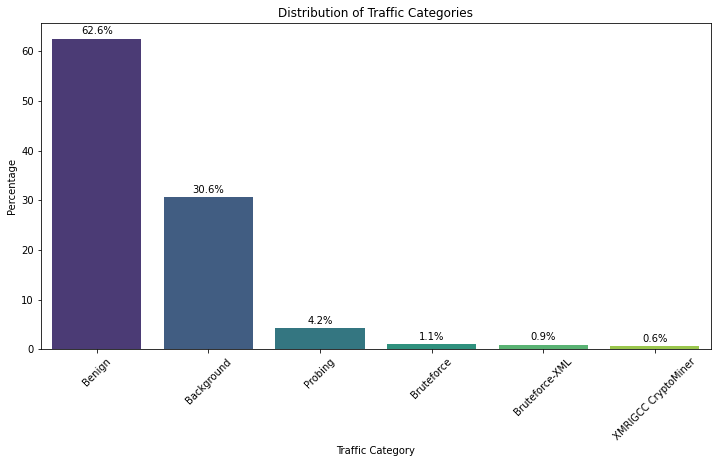

In [30]:
# Calculate the percentage distribution of traffic categories
category_counts = df['traffic_category'].value_counts()
category_percentages = (category_counts / category_counts.sum()) * 100

# Create a bar plot with percentages
plt.figure(figsize=(12, 6))
sns.barplot(x=category_percentages.index, y=category_percentages.values, palette='viridis')
plt.title('Distribution of Traffic Categories')
plt.xlabel('Traffic Category')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
for i in range(len(category_percentages)):
    plt.text(i, category_percentages[i] + 0.5, f'{category_percentages[i]:.1f}%', ha='center', va='bottom')
plt.show()

In [31]:
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0.1', 'Unnamed: 0', 'uid','traffic_category']
data_cleaned = df.drop(columns=columns_to_drop)

# Encode categorical variables
# Frequency Encoding for high-cardinality categorical features
freq_encode_features = ['originh', 'responh']
for col in freq_encode_features:
    freq_encoding = data_cleaned[col].value_counts().to_dict()
    data_cleaned[col] = data_cleaned[col].map(freq_encoding)

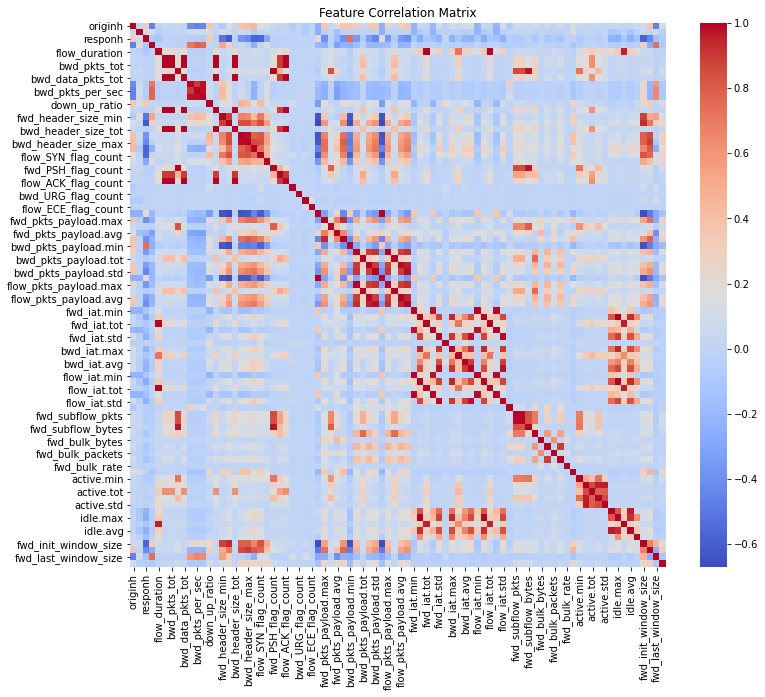

In [32]:
# Compute the correlation matrix
correlation_matrix = data_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [33]:
# Normalise/scale features
features = data_cleaned.drop(columns=['Label'])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Combine scaled features with the label
data_preprocessed = pd.DataFrame(features_scaled, columns=features.columns)
data_preprocessed['Label'] = data_cleaned['Label'].values


In [34]:
# Split the data
X = data_preprocessed.drop(columns=['Label'])
y = data_preprocessed['Label']
# Handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [35]:
# Define models
log_reg = LogisticRegression(max_iter=1000)


In [36]:
rf = RandomForestClassifier()


In [37]:
gbm = GradientBoostingClassifier()

In [38]:
xgb_model = xgb.XGBClassifier()

In [39]:
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

/Users/sako/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [41]:
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)

In [42]:
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [43]:
# Evaluation Metrics Function
def print_evaluation_metrics(model_name, y_test, y_pred):
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred):.4f}")
    print("\n")

In [44]:
print_evaluation_metrics("Logistic Regression", y_test, y_pred_log_reg)

Evaluation Metrics for Logistic Regression:
Accuracy: 0.9221
Precision: 0.8679
Recall: 0.9957
F1-Score: 0.9274
ROC-AUC: 0.9221




In [45]:
print_evaluation_metrics("Random Forest", y_test, y_pred_rf)


Evaluation Metrics for Random Forest:
Accuracy: 0.9215
Precision: 0.9073
Recall: 0.9389
F1-Score: 0.9228
ROC-AUC: 0.9215




In [46]:
print_evaluation_metrics("Gradient Boosting Machine (GBM)", y_test, y_pred_gbm)

Evaluation Metrics for Gradient Boosting Machine (GBM):
Accuracy: 0.9281
Precision: 0.8747
Recall: 0.9994
F1-Score: 0.9329
ROC-AUC: 0.9282




In [47]:
print_evaluation_metrics("XGBoost", y_test, y_pred_xgb)

Evaluation Metrics for XGBoost:
Accuracy: 0.9573
Precision: 0.9529
Recall: 0.9620
F1-Score: 0.9574
ROC-AUC: 0.9573




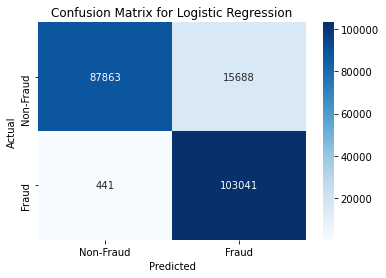

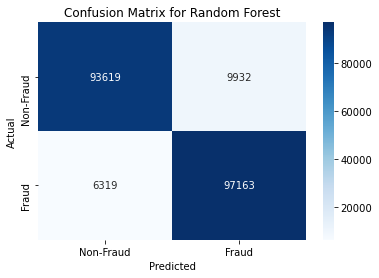

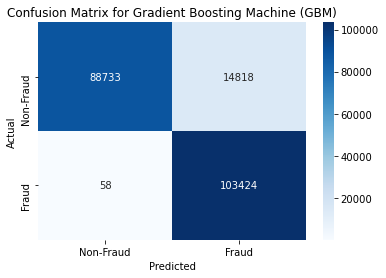

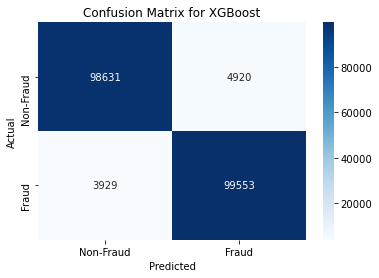

In [48]:
from sklearn.metrics import confusion_matrix
# Plot confusion matrices
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

plot_confusion_matrix(y_test, y_pred_log_reg, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_gbm, "Gradient Boosting Machine (GBM)")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")

In [49]:
# Perform cross-validation
cv_scores_log_reg = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
cv_scores_rf = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
cv_scores_gbm = cross_val_score(gbm, X, y, cv=5, scoring='accuracy')
cv_scores_xgb = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:")
print(f"Logistic Regression: {cv_scores_log_reg.mean():.4f} ± {cv_scores_log_reg.std():.4f}")
print(f"Random Forest: {cv_scores_rf.mean():.4f} ± {cv_scores_rf.std():.4f}")
print(f"Gradient Boosting Machine (GBM): {cv_scores_gbm.mean():.4f} ± {cv_scores_gbm.std():.4f}")
print(f"XGBoost): {cv_scores_xgb.mean():.4f} ± {cv_scores_xgb.std():.4f}")

/Users/sako/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sako/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Cross-Validation Scores:
Logistic Regression: 0.9017 ± 0.0180
Random Forest: 0.8659 ± 0.0739
Gradient Boosting Machine (GBM): 0.8900 ± 0.0341
XGBoost): 0.8761 ± 0.0574


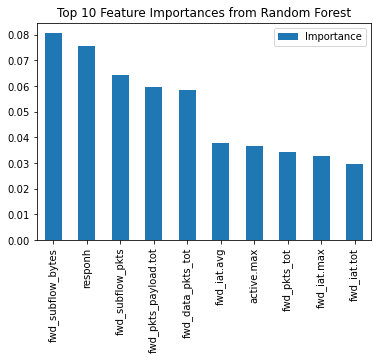

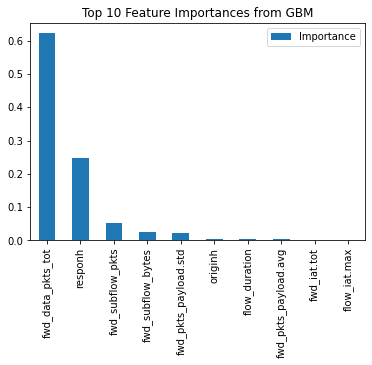

In [50]:
# Feature importance for Random Forest
rf_feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
rf_feature_importances.head(10).plot(kind='bar', title='Top 10 Feature Importances from Random Forest')
plt.show()

# Feature importance for GBM
gbm_feature_importances = pd.DataFrame(gbm.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
gbm_feature_importances.head(10).plot(kind='bar', title='Top 10 Feature Importances from GBM')
plt.show()